In [3]:
#import the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
# import the dataset 
data = pd.read_csv('home_prices.csv')
print(data.head())

   Area  Bedrooms   Price
0  1400         3  245000
1  1600         3  312000
2  1700         3  279000
3  1875         2  308000
4  1100         2  199000


In [9]:
# load the dataset
X = data[['Area' , 'Bedrooms']].values #input features
y = data['Price'].values.reshape(-1, 1) #target values
print(X[:5])
print(y[:5])

[[1400    3]
 [1600    3]
 [1700    3]
 [1875    2]
 [1100    2]]
[[245000]
 [312000]
 [279000]
 [308000]
 [199000]]


In [16]:
#normalize the input features 
X_mean = X.mean(axis=0)
print(X_mean)
X_std = X.std(axis=0)
print(X_std)
X_normalized = (X - X_mean) / X_std
print(X_normalized[:5])

[1715.    3.]
[396.42149286   0.63245553]
[[-0.79460878  0.        ]
 [-0.29009527  0.        ]
 [-0.03783851  0.        ]
 [ 0.40361081 -1.58113883]
 [-1.55137905 -1.58113883]]


In [ ]:
# add a bias term to the input features
X_norm = np.hstack([np.ones((X_normalized.shape[0], 1)),X_normalized])
print(X_norm[:5])

[[ 1.         -0.79460878  0.        ]
 [ 1.         -0.29009527  0.        ]
 [ 1.         -0.03783851  0.        ]
 [ 1.          0.40361081 -1.58113883]
 [ 1.         -1.55137905 -1.58113883]
 [ 1.         -0.41622365  1.58113883]
 [ 1.          1.6018304   1.58113883]
 [ 1.          1.85408716  0.        ]
 [ 1.         -0.73154459  0.        ]
 [ 1.         -0.03783851  0.        ]]


In [18]:
#initailize weights
theta = np.zeros((X_norm.shape[1], 1))
alpha = 0.01 #learning rate
epochs = 1000
m = len(y)

In [19]:
# Train the model using gradient descent
losses = []
for epoch in range(epochs):
    predictions = X_norm @ theta
    error = predictions - y 
    loss = (1/(2*m)) * np.sum(error**2)
    losses.append(loss)
    gradient = (1/m) * (X_norm.T @ error)
    theta -= alpha * gradient

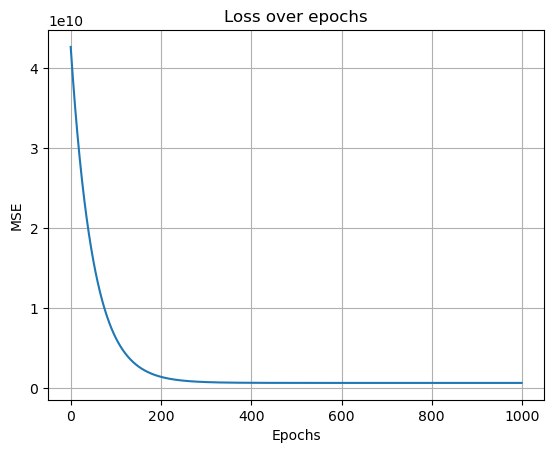

In [20]:
#plot the loss over epochs
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid()
plt.show()

In [21]:
# 7. Predict new house
new_house = np.array([[2000, 3]])
new_house_norm = (new_house - X_mean) / X_std
new_house_norm = np.hstack([np.ones((1, 1)), new_house_norm])
predicted_price = new_house_norm @ theta
print(f"Predicted price for 2000 sqft, 3 bedrooms: ${predicted_price[0][0]:,.2f}")

Predicted price for 2000 sqft, 3 bedrooms: $316,995.28
